<a href="https://colab.research.google.com/github/AndressaLCardoso/Machine-Learning/blob/main/Engenharia_de_Features_Sele%C3%A7%C3%A3o_das_melhores_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Engenharia de Features 
# Autor: Andressa Lira

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [3]:
# Armazenando os dados em um dataframe chamado "data" e exibindo as 5 primeiras linhas.
data = pd.read_csv("kidney-stone-dataset.csv")
data.head(5)

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


In [4]:
X = data.iloc[:,0:20]  # colunas independentes
y = data.iloc[:,-1]    # coluna de destino, ou seja, faixa de preço

In [5]:
# Selecionando as melhores (features)
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [6]:
# Concatena as colunas do dfcolumns (que contém o nome das features)
# A concatenação será realizada horizontalmente, as colunas serão concatenadas lado a lado. 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [7]:
featureScores.columns = ['Especificação','Pontuação']

In [8]:
# Imprime as 10 características (ou variáveis) mais relevantes para a classificação do conjunto de dados.
print(featureScores.nlargest(10,'Pontuação')) 


  Especificação    Pontuação
0    Unnamed: 0  1023.876404
3          osmo   205.046228
5          urea   155.022119
7        target    45.000000
6          calc    43.460500
4          cond     0.205972
2            ph     0.057339
1       gravity     0.000536


In [9]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.21341879 0.0312061  0.00454134 0.00830099 0.01510621 0.0136087
 0.05143872 0.66237915]


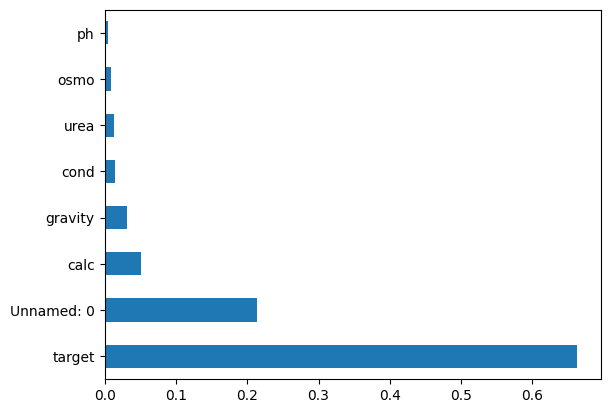

In [10]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

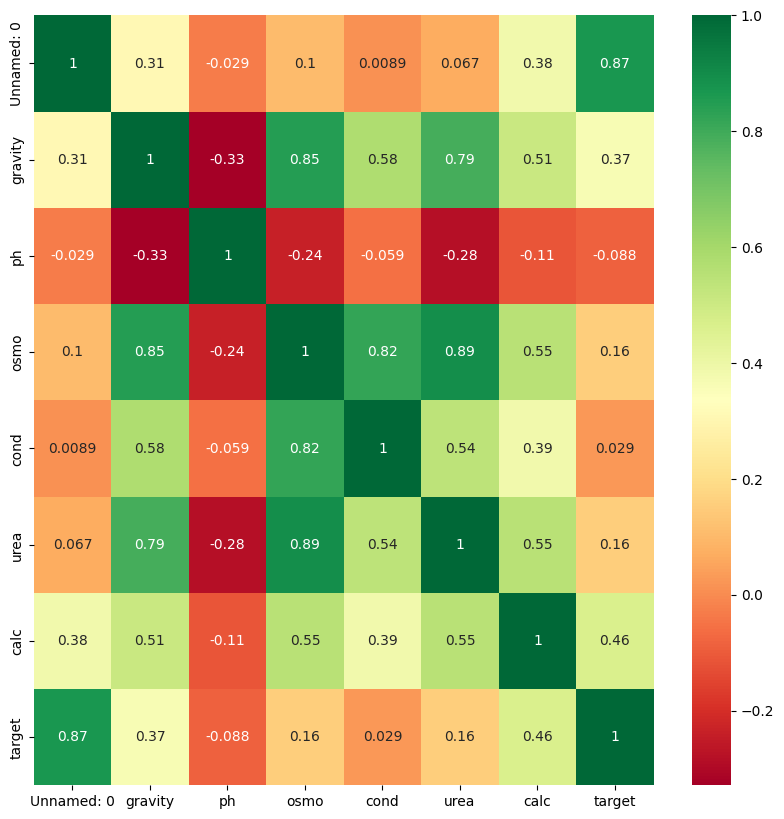

In [11]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 10))

# Traça mapa de calor
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")